In [42]:
#https://iescoders.com/plotting-the-geospatial-data-clipped-by-coastlines-in-python/

In [43]:
#!pip install pyKriging

In [1]:
import numpy as np 
import pandas as pd
from pyKriging import kriging
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df=pd.read_excel("PM25Data.xlsx", header=1)

In [3]:
print(df["Latitude"].max())
print(df["Latitude"].min())

print(df["Longitude"].max())
print(df["Longitude"].min())

91.8985
72.591912
31.62
8.514909300000001


In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

Gov Id       0
Country      0
State        0
City         0
Station      0
Latitude     0
Longitude    0
Status       0
PM25         0
dtype: int64

In [6]:
df[df["State"]=="Delhi"]

,Gov Id,Country,State,City,Station,Latitude,Longitude,Status,PM25
9,site_5024,India,Delhi,Delhi,"Alipur, Delhi - DPCC",77.153010,28.815329,Live,104.0
10,site_301,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",77.316032,28.646835,Live,109.0
11,site_1420,India,Delhi,Delhi,"Ashok Vihar, Delhi - DPCC",77.181665,28.695381,Live,119.0
12,site_108,India,Delhi,Delhi,"Aya Nagar, Delhi - IMD",77.109936,28.470691,Live,50.0
13,site_1560,India,Delhi,Delhi,"Bawana, Delhi - DPCC",77.051074,28.776200,Live,129.0
14,site_104,India,Delhi,Delhi,"Burari Crossing, Delhi - IMD",77.201157,28.725650,Live,95.0
15,site_103,India,Delhi,Delhi,"CRRI Mathura Road, Delhi - IMD",77.273574,28.551201,Live,94.0
16,site_118,India,Delhi,Delhi,"DTU, Delhi - CPCB",77.111261,28.750050,Live,124.0
17,site_1421,India,Delhi,Delhi,"Dr. Karni Singh Shooting Range, Delhi - DPCC",77.264840,28.498571,Live,69.0
18,site_1422,India,Delhi,Delhi,"Dwarka-Sector 8, Delhi - DPCC",77.071901,28.571027,Live,109.0


In [7]:
X=df[["Latitude", "Longitude"]].values

In [8]:
y=np.log(df["PM25"].values)

(array([105.,  90.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  5. ,  73.6, 142.2, 210.8, 279.4, 348. , 416.6, 485.2, 553.8,
        622.4, 691. ]),
 <a list of 10 Patch objects>)

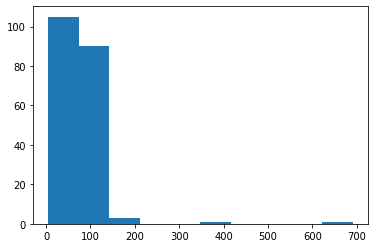

In [9]:
plt.hist(df["PM25"].values)

(array([ 2.,  2.,  2., 21., 37., 93., 40.,  1.,  1.,  1.]),
 array([1.60943791, 2.1023081 , 2.59517829, 3.08804849, 3.58091868,
        4.07378887, 4.56665906, 5.05952925, 5.55239944, 6.04526963,
        6.53813982]),
 <a list of 10 Patch objects>)

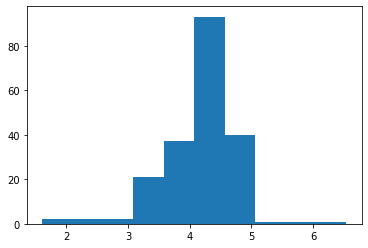

In [10]:
plt.hist(y)

In [11]:
k = kriging(X, y)
k.train()
#print( k.predict([.25,.25])) # 33.83997681862021
#k.plot()

In [14]:
#77.285932	28.655602

print( np.exp(k.predict([77.185932,28.555602])))

87.20180831077509


# 緯度経度のcsvを読み込み

In [84]:
lon_lat=pd.read_csv("in.csv")[[ "lat", "lng"]]

In [85]:
tmp=pd.concat([lon_lat[["lat"]]-0.5, lon_lat[["lng"]]+0.5], axis=1)
res=pd.concat([lon_lat,  tmp])
tmp=pd.concat([lon_lat[["lat"]]-1, lon_lat[["lng"]]+1], axis=1)
lon_lat=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]-1.5, lon_lat[["lng"]]+1.5], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]-2, lon_lat[["lng"]]+2], axis=1)
res=pd.concat([res,  tmp])

tmp=pd.concat([lon_lat[["lat"]]+0.5, lon_lat[["lng"]]-0.5], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]+1, lon_lat[["lng"]]-1], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]+1.5, lon_lat[["lng"]]-1.5], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]+2, lon_lat[["lng"]]-2], axis=1)
res=pd.concat([res,  tmp])

tmp=pd.concat([lon_lat[["lat"]]+0.5, lon_lat[["lng"]]+0.5], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]+1, lon_lat[["lng"]]+1], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]+1.5, lon_lat[["lng"]]+1.5], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]+2, lon_lat[["lng"]]+2], axis=1)
res=pd.concat([res,  tmp])

tmp=pd.concat([lon_lat[["lat"]]-0.5, lon_lat[["lng"]]-0.5], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]-1, lon_lat[["lng"]]-1], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]-1.5, lon_lat[["lng"]]-1.5], axis=1)
res=pd.concat([res,  tmp])
tmp=pd.concat([lon_lat[["lat"]]-2, lon_lat[["lng"]]-2], axis=1)
res=pd.concat([res,  tmp])

In [86]:
res.head()

,lat,lng
0,18.987807,72.836447
1,28.651952,77.231495
2,22.562627,88.363044
3,13.084622,80.248357
4,12.977063,77.587106


In [79]:
#lon_lat["lat"][0:1]

k.predict([res["lng"][0:1].values[0], res["lat"][0:1].values[0]])

4.652040993448896

In [87]:
arr=[]
for i in range(len(res)):
    res_value=np.exp(k.predict([res["lng"][i:i+1].values[0], res["lat"][i:i+1].values[0]]))
    #res=k.predict([lon_lat["lat"][i], lon_lat["lng"][i]])
    arr.append(res_value)
res["values"]=arr

(array([210.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.06702179e+02, 5.05919092e+08, 1.01183808e+09, 1.51775706e+09,
        2.02367605e+09, 2.52959503e+09, 3.03551402e+09, 3.54143300e+09,
        4.04735199e+09, 4.55327098e+09, 5.05918996e+09]),
 <a list of 10 Patch objects>)

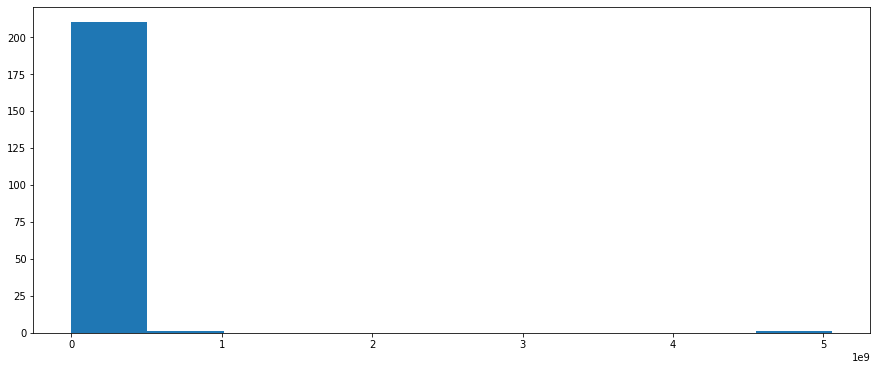

In [53]:
plt.hist(lon_lat["values"])

In [90]:
#res.to_csv("after_kriging.csv")

In [39]:
np.exp(k.predict([ 77.111631, 28.719894]))

145.47272530731843

In [41]:
np.exp(k.predict([77.166274,28.693539]))

125.0474040366484

In [36]:
##検証
df[df["State"]=="Uttar Pradesh"]

,Gov Id,Country,State,City,Station,Latitude,Longitude,Status,PM25
155,site_307,India,Uttar Pradesh,Agra,"Sanjay Palace, Agra - UPPCB",78.005981,27.198658,Live,36.0
156,site_1569,India,Uttar Pradesh,Baghpat,"New Collectorate, Baghpat - UPPCB",77.213357,28.974801,Live,99.0
157,site_1542,India,Uttar Pradesh,Bulandshahr,"Yamunapuram, Bulandshahr - UPPCB",77.849831,28.406963,delay,59.0
158,site_5082,India,Uttar Pradesh,Ghaziabad,"Indirapuram, Ghaziabad - UPPCB",77.358075,28.646233,Live,95.0
159,site_5081,India,Uttar Pradesh,Ghaziabad,"Sanjay Nagar, Ghaziabad - UPPCB",77.453839,28.685382,Live,106.0
160,site_144,India,Uttar Pradesh,Ghaziabad,"Vasundhara, Ghaziabad - UPPCB",77.357256,28.660335,Live,110.0
161,site_1541,India,Uttar Pradesh,Greater_Noida,"Knowledge Park - III, Greater Noida - UPPCB",77.482000,28.472720,Live,409.0
162,site_5121,India,Uttar Pradesh,Greater_Noida,"Knowledge Park - V, Greater Noida - UPPCB",77.453663,28.557054,Live,88.0
163,site_276,India,Uttar Pradesh,Kanpur,"Nehru Nagar, Kanpur - UPPCB",80.322986,26.470314,Live,104.0
164,site_272,India,Uttar Pradesh,Lucknow,"Central School, Lucknow - CPCB",80.930275,26.882100,Live,66.0


In [38]:
np.exp(k.predict([ 80.947051, 26.828001]))

91.90731639738418

In [40]:
df[df["State"]=="Delhi"]

,Gov Id,Country,State,City,Station,Latitude,Longitude,Status,PM25
9,site_5024,India,Delhi,Delhi,"Alipur, Delhi - DPCC",77.153010,28.815329,Live,104.0
10,site_301,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",77.316032,28.646835,Live,109.0
11,site_1420,India,Delhi,Delhi,"Ashok Vihar, Delhi - DPCC",77.181665,28.695381,Live,119.0
12,site_108,India,Delhi,Delhi,"Aya Nagar, Delhi - IMD",77.109936,28.470691,Live,50.0
13,site_1560,India,Delhi,Delhi,"Bawana, Delhi - DPCC",77.051074,28.776200,Live,129.0
14,site_104,India,Delhi,Delhi,"Burari Crossing, Delhi - IMD",77.201157,28.725650,Live,95.0
15,site_103,India,Delhi,Delhi,"CRRI Mathura Road, Delhi - IMD",77.273574,28.551201,Live,94.0
16,site_118,India,Delhi,Delhi,"DTU, Delhi - CPCB",77.111261,28.750050,Live,124.0
17,site_1421,India,Delhi,Delhi,"Dr. Karni Singh Shooting Range, Delhi - DPCC",77.264840,28.498571,Live,69.0
18,site_1422,India,Delhi,Delhi,"Dwarka-Sector 8, Delhi - DPCC",77.071901,28.571027,Live,109.0


In [14]:
!pip install gstools

     |████████████████████████████████| 972kB 412kB/s eta 0:00:01
     |████████████████████████████████| 51kB 8.1MB/s eta 0:00:011
